In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import json

# import contextily as ctx
# from matplotlib_scalebar.scalebar import ScaleBar

In [3]:
proj_dir = Path("../")

geopackage_fn = proj_dir / 'Data/col_drivt_data.gpkg'
landsat_data_fn = proj_dir / 'Data/LandsatTemperature/columbia_clean.csv'
insitu_data_dir = proj_dir / 'Data/In-situ'

In [4]:
# check the layers in the geopackage
import fiona
layers = fiona.listlayers(geopackage_fn)
print(layers)

['Basins', 'Rivers', 'Reaches', 'BufferedReaches', 'Stations']


In [5]:
buffered_reaches = gpd.read_file(geopackage_fn, layer='BufferedReaches')
stations = gpd.read_file(geopackage_fn, layer='Stations')
basin = gpd.read_file(geopackage_fn, layer='Basins')
rivers = gpd.read_file(geopackage_fn, layer='Rivers')
col_river = rivers[rivers['GNIS_Name']=='Columbia River']


<Axes: >

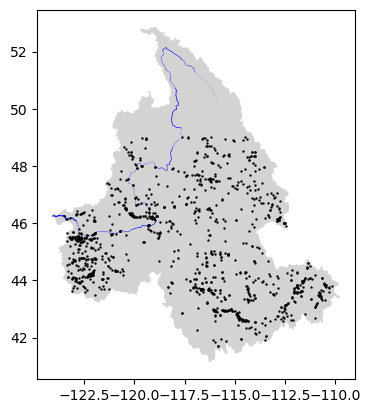

In [6]:
fig, ax = plt.subplots()
basin.plot(ax=ax, color='lightgray')
buffered_reaches.plot(ax=ax, color='blue')
stations.plot(ax=ax, color='black', markersize=0.5)

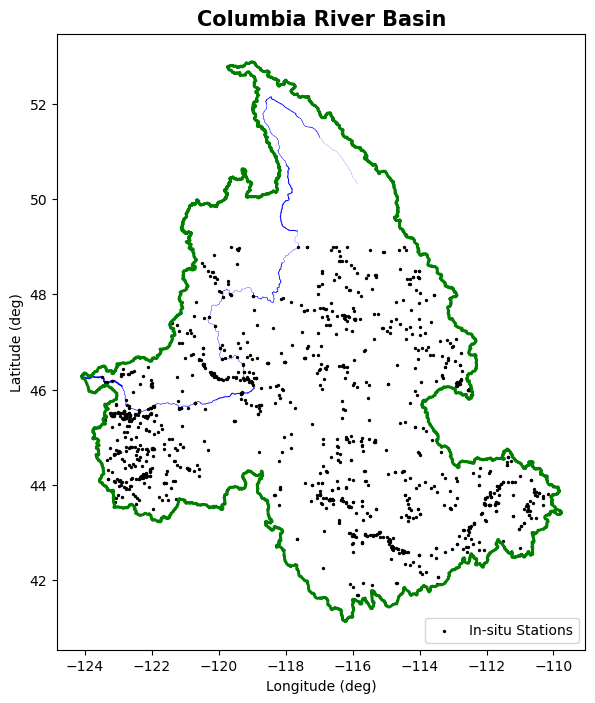

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(8, 8))
# Overlay the outline of Basin
basin.boundary.plot(ax=ax, 
                       edgecolor='green', 
                       linewidth=2
                      )
# Plot River
buffered_reaches.plot(ax=ax, 
               color="blue"
              )

stations.plot(ax=ax, 
               color="black", markersize=2, label="In-situ Stations"
              )

# # Plot basemap
# ctx.add_basemap(ax,
#                 crs=buffered_reaches.to_crs(3857).crs,
#                 source=ctx.providers.Esri.WorldImagery,
#                 alpha=0.8
#                )


# Remove axis clutter
# ax.set_axis_off()
# Add a dynamic scalebar
# scalebar = ScaleBar(1.0, location='lower left') 
# ax.add_artist(scalebar)
ax.legend(loc='lower right')
ax.set_xlabel('Longitude (deg)')
ax.set_ylabel('Latitude (deg)')

plt.title("Columbia River Basin", fontsize=15, fontweight='bold' )
plt.show()

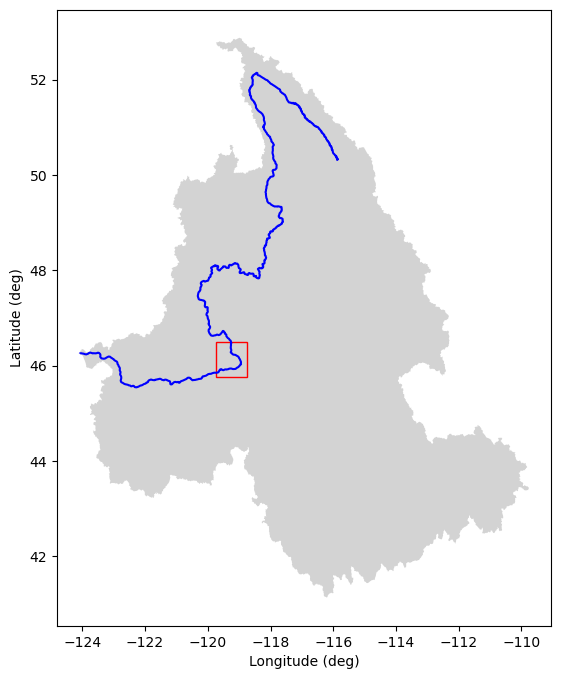

In [8]:
# Plot
fig, ax = plt.subplots(figsize=(8, 8))
# Overlay the outline of Basin
basin.plot(ax=ax, color='lightgray'
                      )
# Plot River
col_river.plot(ax=ax, 
               color="blue"
              )

p = plt.Rectangle((-119.75, 45.75), 1, 0.75, fill=False, color='red')
ax.add_patch(p)


# stations.plot(ax=ax, 
#                color="black", markersize=2, label="In-situ Stations"
#               )

# # Plot basemap
# ctx.add_basemap(ax,
#                 crs=buffered_reaches.to_crs(3857).crs,
#                 source=ctx.providers.Esri.WorldImagery,
#                 alpha=0.8
#                )


# Remove axis clutter
# ax.set_axis_off()
# Add a dynamic scalebar
# scalebar = ScaleBar(1.0, location='lower left') 
# ax.add_artist(scalebar)
# ax.legend(loc='lower right')
ax.set_xlabel('Longitude (deg)')
ax.set_ylabel('Latitude (deg)')

# plt.title("Columbia River Basin", fontsize=15, fontweight='bold' )
plt.show()

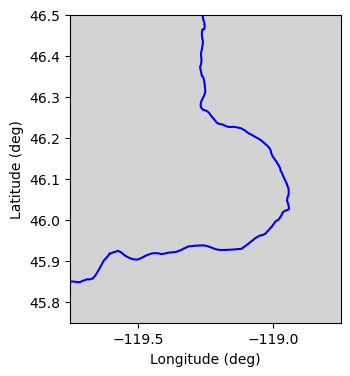

In [9]:
# Plot
fig, ax = plt.subplots(figsize=(4, 4))
# Overlay the outline of Basin
basin.plot(ax=ax, color='lightgray'
                      )
# Plot River
col_river.plot(ax=ax, 
               color="blue"
              )

# p = plt.Rectangle((-120, 45.5), 1.5, 1, fill=False, color='red')
# ax.add_patch(p)


# stations.plot(ax=ax, 
#                color="black", markersize=2, label="In-situ Stations"
#               )

# # Plot basemap
# ctx.add_basemap(ax,
#                 crs=buffered_reaches.to_crs(3857).crs,
#                 source=ctx.providers.Esri.WorldImagery,
#                 alpha=0.8
#                )


# Remove axis clutter
# ax.set_axis_off()
# Add a dynamic scalebar
# scalebar = ScaleBar(1.0, location='lower left') 
# ax.add_artist(scalebar)
# ax.legend(loc='lower right')
ax.set_xlabel('Longitude (deg)')
ax.set_ylabel('Latitude (deg)')
ax.set_xlim(-119.75, -118.75)
ax.set_ylim(45.75, 46.5)
ax.set_xticks([-119.5, -119])

# plt.title("Columbia River Basin", fontsize=15, fontweight='bold' )
plt.show()

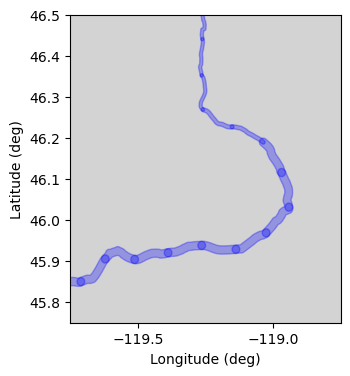

In [10]:
# Plot
fig, ax = plt.subplots(figsize=(4, 4))
# Overlay the outline of Basin
basin.plot(ax=ax, color='lightgray'
                      )
# Plot River
buffered_reaches.plot(ax=ax, 
               color='blue', alpha=0.3, edgecolor='blue', lw=1
                      
              )

# p = plt.Rectangle((-120, 45.5), 1.5, 1, fill=False, color='red')
# ax.add_patch(p)


# stations.plot(ax=ax, 
#                color="black", markersize=2, label="In-situ Stations"
#               )

# # Plot basemap
# ctx.add_basemap(ax,
#                 crs=buffered_reaches.to_crs(3857).crs,
#                 source=ctx.providers.Esri.WorldImagery,
#                 alpha=0.8
#                )


# Remove axis clutter
# ax.set_axis_off()
# Add a dynamic scalebar
# scalebar = ScaleBar(1.0, location='lower left') 
# ax.add_artist(scalebar)
# ax.legend(loc='lower right')
ax.set_xlabel('Longitude (deg)')
ax.set_ylabel('Latitude (deg)')
ax.set_xlim(-119.75, -118.75)
ax.set_ylim(45.75, 46.5)
ax.set_xticks([-119.5, -119])

# plt.title("Columbia River Basin", fontsize=15, fontweight='bold' )
plt.show()

In [11]:
# use lambda to filter stations with temperature data or discharge data
stations = stations[stations['available_data'].apply(lambda x: 'conditions' in json.loads(x))]
stations = stations[(stations['available_data'].apply(lambda x: 'avg_temp(C)' in json.loads(x)['conditions'])) | (stations['available_data'].apply(lambda x: 'outflow(m3/d)' in json.loads(x)['conditions']))]

In [12]:
# find stations within the buffered reaches (i.e. stations that are along the Columbia river)
stations_in_buffer = stations[stations.within(buffered_reaches.unary_union)].copy()

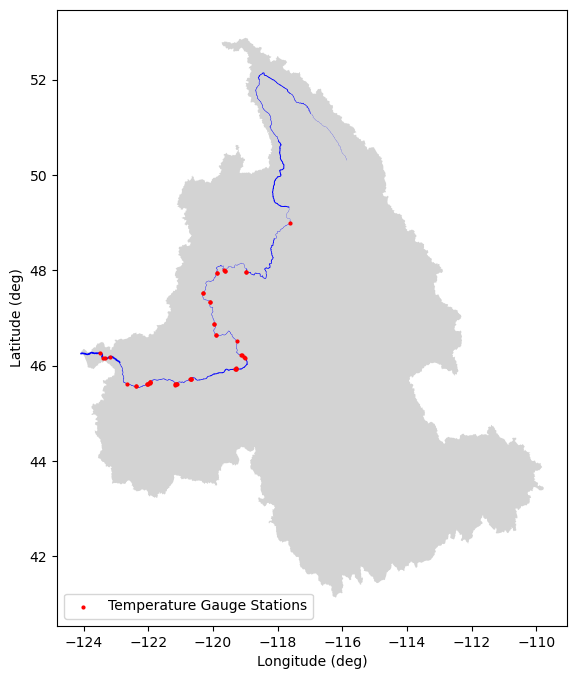

In [15]:
# filter temperature locations within the buffered
fig, ax = plt.subplots(figsize=(8, 8))
basin.plot(ax=ax, color='lightgray')
buffered_reaches.plot(ax=ax, color='blue')
stations_in_buffer.plot(ax=ax, color='red', markersize=4, label='Temperature Gauge Stations')

ax.set_xlabel('Longitude (deg)')
ax.legend(loc='lower left')
ax.set_ylabel('Latitude (deg)');

In [12]:
buffered_reaches.columns

Index(['GNIS_Name', 'reach_id', 'RKm', 'index_right', 'OBJECTID', 'ID',
       'WidthMin', 'width_med_', 'WidthMean', 'WidthMax', 'width_sd_m',
       'lakeFlag', 'nSegPx', 'Shape_Leng', 'distance', 'geometry'],
      dtype='object')

In [13]:
buffered_reaches.drop(columns=[col for col in buffered_reaches.columns if col in ['index_right', 'index_left']], inplace=True)
stations_in_buffer.drop(columns=[col for col in stations_in_buffer.columns if col in ['index_right', 'index_left']], inplace=True)

# join the stations with the attributes from the buffered reaches
stations_in_buffer = stations_in_buffer.sjoin(buffered_reaches, how='left', predicate='within')
# stations_in_buffer.head()

In [14]:
# # show duplicates in stations_in_buffer
# stations_in_buffer[stations_in_buffer.duplicated(subset='station_ID', keep=False)][['station_ID', 'RKm']]

# # # drop duplicates
# # stations_in_buffer.drop_duplicates(subset='station_ID', inplace=True)

In [15]:
lsat_data = pd.read_csv(landsat_data_fn, parse_dates=['Date'])

In [16]:
lsat_data['Date'] = pd.to_datetime(lsat_data['Date'])

In [17]:
stations_in_buffer.columns


Index(['station_ID', 'id_at_source', 'available_data', 'source_URL',
       'latitude', 'longitude', 'description', 'site_params', 'geometry',
       'index_right', 'GNIS_Name', 'reach_id', 'RKm', 'OBJECTID', 'ID',
       'WidthMin', 'width_med_', 'WidthMean', 'WidthMax', 'width_sd_m',
       'lakeFlag', 'nSegPx', 'Shape_Leng', 'distance'],
      dtype='object')

In [18]:
combined_insitu = pd.DataFrame()

for station in stations_in_buffer.itertuples():
    insitu_fn = insitu_data_dir / f"{station.station_ID}.csv"
    if insitu_fn.exists():
        insitu_data = pd.read_csv(insitu_fn, parse_dates=['date'])
        # insitu_data.to_csv(proj_dir/'Data/In-situ'/f"{station.station_ID}.csv", index=False)
        # drop utc in date
        insitu_data['date'] = insitu_data['date'].dt.tz_localize(None)

        # keep date and average temperature
        # insitu_data = insitu_data[['date', 'avg_temp(C)', ]]
        # replace -999999 with nan
        # insitu_data.replace(-999999, np.nan, inplace=True)
        insitu_data.dropna(inplace=True)
        insitu_data['station_ID'] = station.station_ID
        insitu_data['RKm'] = station.RKm
        combined_insitu = pd.concat([combined_insitu, insitu_data])
        # break

# combined_insitu = pd.concat(combined_insitu)

combined_insitu.rename(columns={'date': 'Date'}, inplace=True)
# combined_insitu = combined_insitu.merge(lsat_data, on='Date', how='left')
# Data/insitu/conditions/processed

In [19]:
# combined_insitu drop values less than -10
combined_insitu = combined_insitu[combined_insitu['avg_temp(C)'] > -10]

In [21]:
# combined_insitu.sort_values(by='outflow(m3/d)').plot('outflow(m3/d)', 'avg_temp(C)', kind='scatter')

## Compare Landsat Data with Insitu

### All Landsat Missions

In [20]:
# insitu_lsat = pd.merge(combined_insitu, lsat_data[lsat_data['Mission'] == "L5"], on=['Date', 'RKm'], how='inner')
insitu_lsat = pd.merge(combined_insitu, lsat_data, on=['Date', 'RKm'], how='inner')

In [21]:
insitu_lsat_clean = insitu_lsat[(insitu_lsat['avg_temp(C)'] >=-10) & (insitu_lsat['WaterTempC'] >=-40) & (insitu_lsat['WaterTempC'] <= 80) & (insitu_lsat['avg_temp(C)'] <= 40)].copy()
# insitu_lsat_clean = insitu_lsat_clean[insitu_lsat_clean['WaterTempC'] >=0]

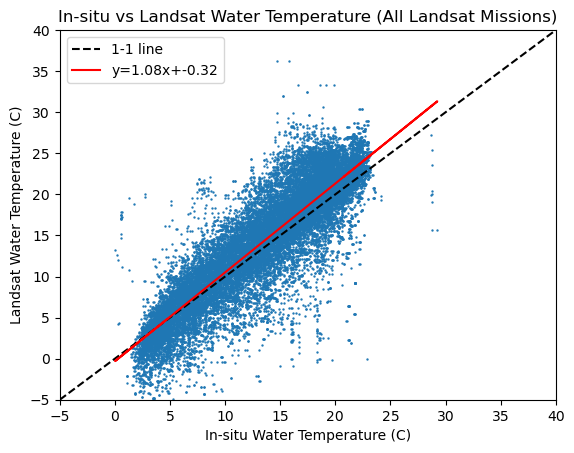

In [22]:
# generate line of best fit
# m, b = np.polyfit(insitu_lsat_clean['WaterTempC'], insitu_lsat_clean['avg_temp(C)'], 1)
m, b = np.polyfit(insitu_lsat_clean['avg_temp(C)'], insitu_lsat_clean['WaterTempC'], 1)

intersect = b / (1 - m)

fig, ax = plt.subplots(#figsize=(10, 10)
    )
insitu_lsat_clean.plot.scatter(y='WaterTempC', x='avg_temp(C)', ax=ax, s=0.5)
# draw 1-1 line
ax.plot([-5, 40], [-5, 40], color='black', linestyle='--', label='1-1 line')
ax.plot(insitu_lsat_clean['avg_temp(C)'], m*insitu_lsat_clean['avg_temp(C)'] + b, color='red', label=f'y={m:.2f}x+{b:.2f}')

# ax.plot([intersect, intersect], [-5, 40], color='green', linestyle='--', label=f'intersect={intersect:.2f}')

ax.set_ylabel('Landsat Water Temperature (C)')
ax.set_xlabel('In-situ Water Temperature (C)')
ax.set_xlim(-5, 40)
ax.set_ylim(-5, 40)

ax.set_title('In-situ vs Landsat Water Temperature (All Landsat Missions)')

ax.legend();

In [32]:
# bin insitu_lsat by average temperature
insitu_lsat_clean['avg_temp_bin'] = pd.cut(insitu_lsat_clean['avg_temp(C)'], bins=np.arange(-5, 40, 2.5))

# calculate mean, min, max, 75, 25, and standard deviation of water temperature
insitu_lsat_agg = insitu_lsat_clean.groupby('avg_temp_bin').agg({'WaterTempC': ['mean', 'min', 'max', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.5)]})

insitu_lsat_agg.columns = ['mean', 'min', 'max', 'std', 'q25', 'q75', 'q50']

insitu_lsat_agg.reset_index(inplace=True)
insitu_lsat_agg['avg_temp(C)'] = insitu_lsat_agg['avg_temp_bin'].apply(lambda x: x.mid)


In [33]:
insitu_lsat_agg['iqr'] = insitu_lsat_agg['q75'] - insitu_lsat_agg['q25']

In [44]:
insitu_lsat_agg.mean()

/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_2364/3279678430.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  insitu_lsat_agg.mean()


mean    13.821281
min     -5.688346
max     35.872691
std      3.420137
q25     12.250304
q75     15.461174
q50     13.722659
iqr      3.210869
dtype: float64

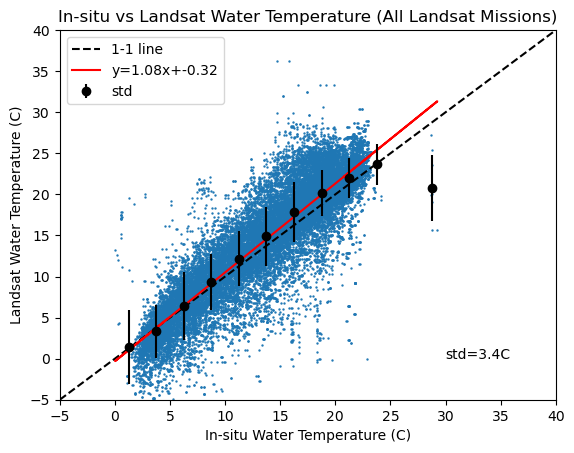

In [49]:
# generate line of best fit
# m, b = np.polyfit(insitu_lsat_clean['WaterTempC'], insitu_lsat_clean['avg_temp(C)'], 1)
m, b = np.polyfit(insitu_lsat_clean['avg_temp(C)'], insitu_lsat_clean['WaterTempC'], 1)

intersect = b / (1 - m)

fig, ax = plt.subplots(#figsize=(10, 10)
    )
insitu_lsat_clean.plot.scatter(y='WaterTempC', x='avg_temp(C)', ax=ax, s=0.5)
# draw 1-1 line
ax.plot([-5, 40], [-5, 40], color='black', linestyle='--', label='1-1 line')
ax.plot(insitu_lsat_clean['avg_temp(C)'], m*insitu_lsat_clean['avg_temp(C)'] + b, color='red', label=f'y={m:.2f}x+{b:.2f}')

# plot the error bars
ax.errorbar(insitu_lsat_agg['avg_temp(C)'], insitu_lsat_agg['mean'], yerr=insitu_lsat_agg['std'], fmt='o', color='black', label='std')

# ax.plot([intersect, intersect], [-5, 40], color='green', linestyle='--', label=f'intersect={intersect:.2f}')

ax.set_ylabel('Landsat Water Temperature (C)')
ax.set_xlabel('In-situ Water Temperature (C)')
ax.set_xlim(-5, 40)
ax.set_ylim(-5, 40)

ax.set_title('In-situ vs Landsat Water Temperature (All Landsat Missions)')

# add annotation to the plot for the mean standard deviation = 3.4 C
ax.annotate('std=3.4C', xy=(30, 0), xytext=(30, 0),
            # arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.legend();

<Axes: ylabel='Frequency'>

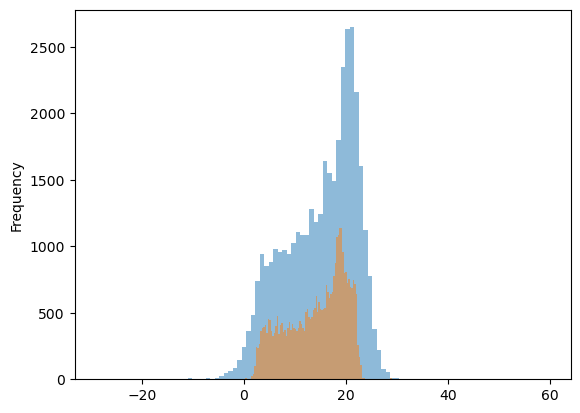

In [21]:
# plot a histogram of the landsat and in-situ water temperature
fig, ax = plt.subplots()
insitu_lsat_clean['WaterTempC'].plot.hist(ax=ax, bins=100, alpha=0.5, label='Landsat')
insitu_lsat_clean['avg_temp(C)'].plot.hist(ax=ax, bins=100, alpha=0.5, label='In-situ')

### Landsat 9 Mission

In [22]:
insitu_lsat9 = pd.merge(combined_insitu, lsat_data[lsat_data['Mission'] == "L9"], on=['Date', 'RKm'], how='inner')
# insitu_lsat = pd.merge(combined_insitu, lsat_data, on=['Date', 'RKm'], how='inner')

In [23]:
insitu_lsat9_clean = insitu_lsat9[(insitu_lsat9['avg_temp(C)'] >=-10) & (insitu_lsat9['WaterTempC'] >=-40) & (insitu_lsat9['WaterTempC'] <= 80) & (insitu_lsat9['avg_temp(C)'] <= 40)]
# insitu_lsat9_clean = insitu_lsat9_clean[insitu_lsat9_clean['WaterTempC'] >=0]

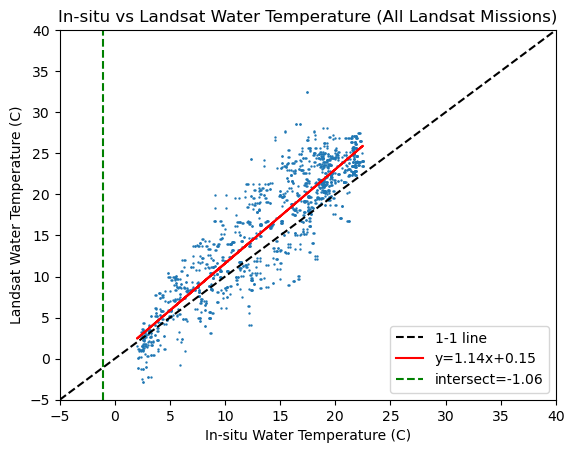

In [24]:
# generate line of best fit
m, b = np.polyfit(insitu_lsat9_clean['avg_temp(C)'], insitu_lsat9_clean['WaterTempC'], 1)

intersect = b / (1 - m)

fig, ax = plt.subplots(#figsize=(10, 10)
    )
insitu_lsat9_clean.plot.scatter(y='WaterTempC', x='avg_temp(C)', ax=ax, s=0.5)
# draw 1-1 line
ax.plot([-5, 40], [-5, 40], color='black', linestyle='--', label='1-1 line')
ax.plot(insitu_lsat9_clean['avg_temp(C)'], m*insitu_lsat9_clean['avg_temp(C)'] + b, color='red', label=f'y={m:.2f}x+{b:.2f}')

ax.plot([intersect, intersect], [-5, 40], color='green', linestyle='--', label=f'intersect={intersect:.2f}')

ax.set_ylabel('Landsat Water Temperature (C)')
ax.set_xlabel('In-situ Water Temperature (C)')
ax.set_xlim(-5, 40)
ax.set_ylim(-5, 40)

ax.set_title('In-situ vs Landsat Water Temperature (All Landsat Missions)')

ax.legend();

### Landsat 8 Mission

In [25]:
insitu_lsat8 = pd.merge(combined_insitu, lsat_data[lsat_data['Mission'] == "L8"], on=['Date', 'RKm'], how='inner')
# insitu_lsat = pd.merge(combined_insitu, lsat_data, on=['Date', 'RKm'], how='inner')

In [26]:
insitu_lsat8_clean = insitu_lsat8[(insitu_lsat8['avg_temp(C)'] >=-10) & (insitu_lsat8['WaterTempC'] >=-40) & (insitu_lsat8['WaterTempC'] <= 80) & (insitu_lsat8['avg_temp(C)'] <= 40)]
# insitu_lsat8_clean = insitu_lsat8_clean[insitu_lsat8_clean['WaterTempC'] >=0]

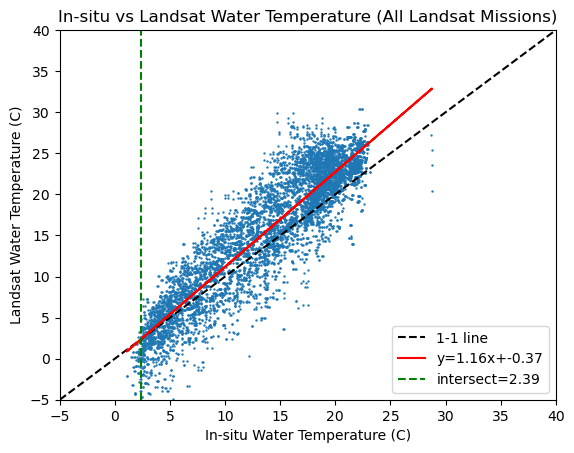

In [27]:
# generate line of best fit
m, b = np.polyfit(insitu_lsat8_clean['avg_temp(C)'], insitu_lsat8_clean['WaterTempC'], 1)

intersect = b / (1 - m)

fig, ax = plt.subplots(#figsize=(10, 10)
    )
insitu_lsat8_clean.plot.scatter(y='WaterTempC', x='avg_temp(C)', ax=ax, s=0.5)
# draw 1-1 line
ax.plot([-5, 40], [-5, 40], color='black', linestyle='--', label='1-1 line')
ax.plot(insitu_lsat8_clean['avg_temp(C)'], m*insitu_lsat8_clean['avg_temp(C)'] + b, color='red', label=f'y={m:.2f}x+{b:.2f}')

ax.plot([intersect, intersect], [-5, 40], color='green', linestyle='--', label=f'intersect={intersect:.2f}')

ax.set_ylabel('Landsat Water Temperature (C)')
ax.set_xlabel('In-situ Water Temperature (C)')
ax.set_xlim(-5, 40)
ax.set_ylim(-5, 40)

ax.set_title('In-situ vs Landsat Water Temperature (All Landsat Missions)')

ax.legend();

### Landsat 7 Mission

In [29]:
insitu_lsat7 = pd.merge(combined_insitu, lsat_data[lsat_data['Mission'] == "L7"], on=['Date', 'RKm'], how='inner')
# insitu_lsat = pd.merge(combined_insitu, lsat_data, on=['Date', 'RKm'], how='inner')

In [30]:
insitu_lsat7_clean = insitu_lsat7[(insitu_lsat7['avg_temp(C)'] >=-10) & (insitu_lsat7['WaterTempC'] >=-40) & (insitu_lsat7['WaterTempC'] <= 80) & (insitu_lsat7['avg_temp(C)'] <= 40)]
# insitu_lsat7_clean = insitu_lsat7_clean[insitu_lsat7_clean['WaterTempC'] >=0]

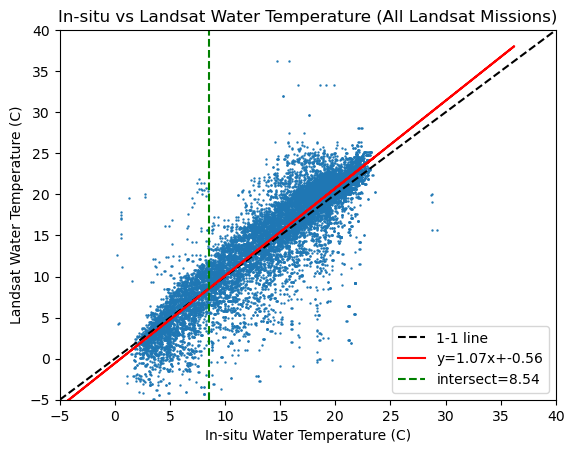

In [31]:
# generate line of best fit
m, b = np.polyfit(insitu_lsat7_clean['avg_temp(C)'], insitu_lsat7_clean['WaterTempC'], 1)

intersect = b / (1 - m)

fig, ax = plt.subplots(#figsize=(10, 10)
    )
insitu_lsat7_clean.plot.scatter(y='WaterTempC', x='avg_temp(C)', ax=ax, s=0.5)
# draw 1-1 line
ax.plot([-5, 40], [-5, 40], color='black', linestyle='--', label='1-1 line')
ax.plot(insitu_lsat7_clean['avg_temp(C)'], m*insitu_lsat7_clean['avg_temp(C)'] + b, color='red', label=f'y={m:.2f}x+{b:.2f}')

ax.plot([intersect, intersect], [-5, 40], color='green', linestyle='--', label=f'intersect={intersect:.2f}')

ax.set_ylabel('Landsat Water Temperature (C)')
ax.set_xlabel('In-situ Water Temperature (C)')
ax.set_xlim(-5, 40)
ax.set_ylim(-5, 40)

ax.set_title('In-situ vs Landsat Water Temperature (All Landsat Missions)')

ax.legend();

### Landsat 5 Mission

In [32]:
insitu_lsat5 = pd.merge(combined_insitu, lsat_data[lsat_data['Mission'] == "L5"], on=['Date', 'RKm'], how='inner')
# insitu_lsat = pd.merge(combined_insitu, lsat_data, on=['Date', 'RKm'], how='inner')

In [33]:
insitu_lsat5_clean = insitu_lsat5[(insitu_lsat5['avg_temp(C)'] >=-10) & (insitu_lsat5['WaterTempC'] >=-40) & (insitu_lsat5['WaterTempC'] <= 80) & (insitu_lsat5['avg_temp(C)'] <= 40)]
# insitu_lsat5_clean = insitu_lsat5_clean[insitu_lsat5_clean['WaterTempC'] >=0]

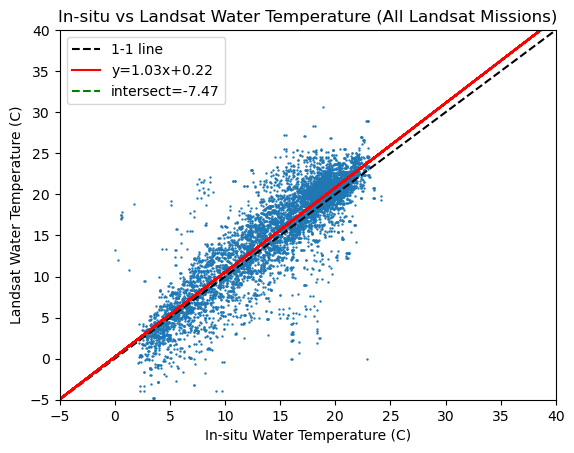

In [34]:
# generate line of best fit
m, b = np.polyfit(insitu_lsat5_clean['avg_temp(C)'], insitu_lsat5_clean['WaterTempC'], 1)

intersect = b / (1 - m)

fig, ax = plt.subplots(#figsize=(10, 10)
    )
insitu_lsat5_clean.plot.scatter(y='WaterTempC', x='avg_temp(C)', ax=ax, s=0.5)
# draw 1-1 line
ax.plot([-5, 40], [-5, 40], color='black', linestyle='--', label='1-1 line')
ax.plot(insitu_lsat5_clean['avg_temp(C)'], m*insitu_lsat5_clean['avg_temp(C)'] + b, color='red', label=f'y={m:.2f}x+{b:.2f}')

ax.plot([intersect, intersect], [-5, 40], color='green', linestyle='--', label=f'intersect={intersect:.2f}')

ax.set_ylabel('Landsat Water Temperature (C)')
ax.set_xlabel('In-situ Water Temperature (C)')
ax.set_xlim(-5, 40)
ax.set_ylim(-5, 40)

ax.set_title('In-situ vs Landsat Water Temperature (All Landsat Missions)')

ax.legend();

### Landsat 4 Mission

In [41]:
insitu_lsat4 = pd.merge(combined_insitu, lsat_data[lsat_data['Mission'] == "L4"], on=['Date', 'RKm'], how='inner')
# insitu_lsat = pd.merge(combined_insitu, lsat_data, on=['Date', 'RKm'], how='inner')

In [42]:
insitu_lsat4_clean = insitu_lsat4[(insitu_lsat4['avg_temp(C)'] >=-10) & (insitu_lsat4['WaterTempC'] >=-40) & (insitu_lsat4['WaterTempC'] <= 80) & (insitu_lsat4['avg_temp(C)'] <= 40)]
# insitu_lsat4_clean = insitu_lsat4_clean[insitu_lsat4_clean['WaterTempC'] >=0]

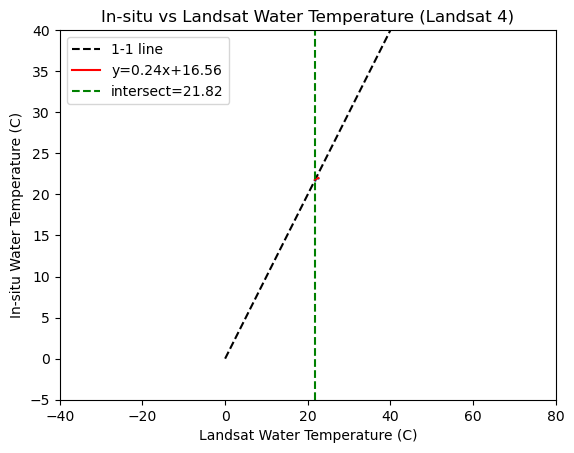

In [43]:
# generate line of best fit
m, b = np.polyfit(insitu_lsat4_clean['avg_temp(C)'], insitu_lsat4_clean['WaterTempC'], 1)

intersect = b / (1 - m)

fig, ax = plt.subplots(#figsize=(10, 10)
    )
insitu_lsat4_clean.plot.scatter(y='WaterTempC', x='avg_temp(C)', ax=ax, s=0.5)
# draw 1-1 line
ax.plot([-5, 40], [-5, 40], color='black', linestyle='--', label='1-1 line')
ax.plot(insitu_lsat4_clean['avg_temp(C)'], m*insitu_lsat4_clean['avg_temp(C)'] + b, color='red', label=f'y={m:.2f}x+{b:.2f}')

ax.plot([intersect, intersect], [-5, 40], color='green', linestyle='--', label=f'intersect={intersect:.2f}')

ax.set_ylabel('Landsat Water Temperature (C)')
ax.set_xlabel('In-situ Water Temperature (C)')
ax.set_xlim(-5, 40)
ax.set_ylim(-5, 40)

ax.set_title('In-situ vs Landsat Water Temperature (All Landsat Missions)')

ax.legend();

In [44]:
insitu_lsat_ = pd.merge(combined_insitu, lsat_data, on=['Date', 'RKm'], how='inner')
insitu_lsat_ = insitu_lsat_[(insitu_lsat_['avg_temp(C)'] >=-10) & (insitu_lsat_['WaterTempC'] >=-40) & (insitu_lsat_['WaterTempC'] <= 80) & (insitu_lsat_['avg_temp(C)'] <= 40)]

In [45]:
# bin insitu_lsat by average temperature
insitu_lsat_['avg_temp_bin'] = pd.cut(insitu_lsat_['avg_temp(C)'], bins=np.arange(-5, 40, 2.5))

# calculate mean, min, max, 75, 25, and standard deviation of water temperature
insitu_lsat_agg = insitu_lsat_.groupby('avg_temp_bin').agg({'WaterTempC': ['mean', 'min', 'max', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]})

insitu_lsat_agg.columns = ['mean', 'min', 'max', 'std', 'q25', 'q75']

insitu_lsat_agg.reset_index(inplace=True)


In [46]:
insitu_lsat_agg['iqr'] = insitu_lsat_agg['q75'] - insitu_lsat_agg['q25']

<Axes: xlabel='avg_temp_bin'>

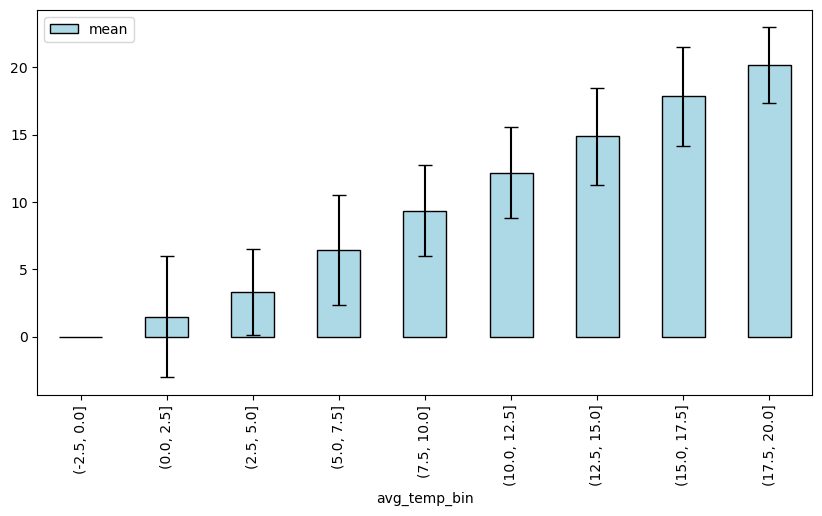

In [50]:
insitu_lsat_agg.iloc[1:10].plot('avg_temp_bin', 'mean', yerr='std', kind='bar', color='lightblue', edgecolor='black', capsize=5, figsize=(10, 5))